In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data=pd.read_csv("C:\\Users\\Subrat\\Downloads\\train_csv.csv")
data

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70
5,5,2019-03-19 00:00:50,302.08
6,6,2019-03-19 00:01:00,152.25
7,7,2019-03-19 00:01:10,41.19
8,8,2019-03-19 00:01:20,34.61
9,9,2019-03-19 00:01:30,205.87


In [42]:
data['time_min'] = data['time'].str[14:16]
data['time_sec']= data['time'].str[17:]

data['time_min'] = data['time_min'].astype(int)
data['time_sec'] = data['time_sec'].astype(int)
data['Time'] = (data['time_min']*60 + data['time_sec'])
data = data.drop('time_min',axis=1)
data = data.drop('time_sec',axis=1)
data = data.drop('time',axis=1)


In [43]:
data.head()

,id,feature,Time
0,0,237.97,0
1,1,57.93,10
2,2,90.53,20
3,3,260.75,30
4,4,49.70,40


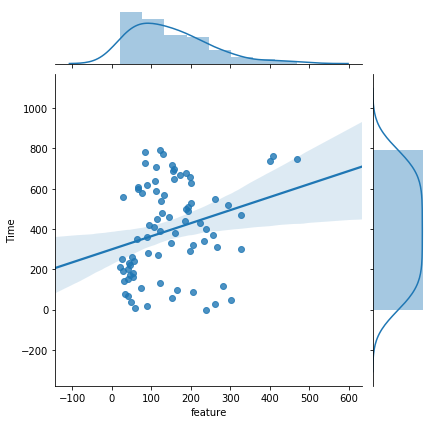

In [44]:
sns.jointplot(x='feature',y='Time',data=data, kind="reg")

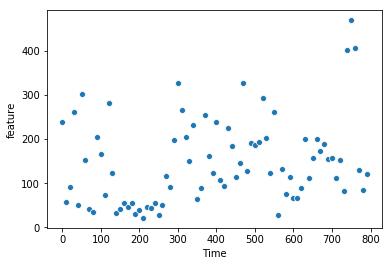

In [45]:
sns.scatterplot(x='Time',y='feature',data=data)

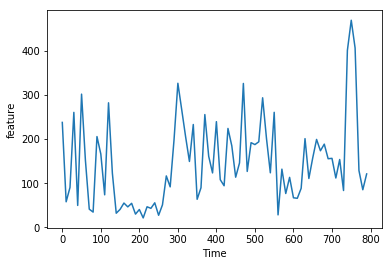

In [46]:
sns.lineplot(x='Time',y='feature',data=data)

In [47]:
data.describe()

,id,feature,Time
count,80.0000,80.000000,80.000000
mean,39.5000,147.496375,395.000000
std,23.2379,96.846260,232.379001
min,0.0000,21.360000,0.000000
25%,19.7500,66.730000,197.500000
50%,39.5000,125.240000,395.000000
75%,59.2500,199.820000,592.500000
max,79.0000,469.720000,790.000000


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x=data.drop(['feature'],axis=1)
y=data['feature']

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)  ##splitting the data into 70 :30 ratio

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
LR=LinearRegression()

In [53]:
LR.fit(xtrain,ytrain)  ## fitting the base model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
print(LR.intercept_)

90.93711830480393


In [55]:
print(LR.coef_)

[0.0140109  0.14010903]


In [56]:
y_pred = LR.predict(xtest)
y_pred

array([161.69217997, 129.1448516 , 133.3901553 , 199.89991326,
       154.6166738 , 191.40930586, 184.3337997 , 187.16400216,
       158.8619775 , 188.5791034 , 147.54116763, 180.088496  ,
        93.76732077, 192.8244071 , 164.52238243, 139.05056023,
        95.182422  , 122.06934544, 100.84282694, 127.72975037,
       150.3713701 , 144.71096517, 148.95626887, 202.73011573])

In [57]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df

,Actual,Predicted
50,187.70,161.692180
27,116.61,129.144852
30,326.76,133.390155
77,128.91,199.899913
45,113.74,154.616674
71,111.91,191.409306
66,199.37,184.333800
68,188.69,187.164002
48,126.81,158.861977
69,155.62,188.579103


In [58]:
r2train=LR.score(xtest,ytest)

r2train

-0.08420545134924007

In [59]:
r2train=LR.score(xtrain,ytrain)

r2train

0.09754271636071765

since the r2 value is almost same for both the values we say that that the there is no bias in the train test spilt

In [60]:
import statsmodels.api as sm

In [61]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()

C:\Users\Subrat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                feature   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.150
Date:                Fri, 17 Apr 2020   Prob (F-statistic):             0.0153
Time:                        21:29:06   Log-Likelihood:                -475.83
No. Observations:                  80   AIC:                             955.7
Df Residuals:                      78   BIC:                             960.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.9921     20.787      4.955      0.000      61.608     144.376
id             0.0112      0.004      2.480      0.015       0.002       0.020
Time           0.1116      0.045      2.480      0.015       0.022       0.201
==============================================================================
Omnibus:                       11.951   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.066
Skew:                           0.984   Prob(JB):                      0.00145
Kurtosis:                       3.219   Cond. No.                     1.11e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the above we can see that the model r2 is 0.073 which is really a bad model since it performance only 7%

Linear Regression: 94.669918 (10.352503)


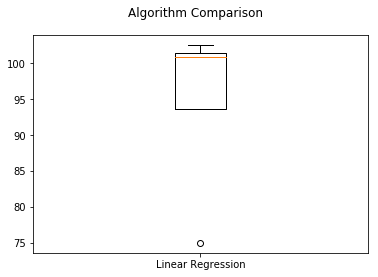

In [63]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import  model_selection
results = []
names = []
models=[]

models.append(('Linear Regression',LR))

for name, model in models:
    kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print('%s: %f (%f)' % (name,np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)))))
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNet

# Ridge
Ri = Ridge()
param_ridge = {'alpha': np.arange(0.01,1,0.1)}
GS_ridge = GridSearchCV(Ri, param_ridge, cv = 5)
GS_ridge.fit(x,y)
GS_ridge.best_params_

{'alpha': 0.91}

In [65]:
# Lasso
La = Lasso()
param_lasso = {'alpha': np.arange(0.01,1,0.1)}
GS_Lasso = GridSearchCV(La, param_lasso, cv = 5)
GS_Lasso.fit(x,y)
GS_Lasso.best_params_

{'alpha': 0.91}

In [66]:
El = ElasticNet()
param_Elastic = {'alpha': np.arange(0.01,1,0.1), 'l1_ratio' : np.arange(0.1,1,0.01)}
GS_Elastic = GridSearchCV(El, param_Elastic, cv = 5)
GS_Elastic.fit(x,y)
GS_Elastic.best_params_

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Subrat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

{'alpha': 0.91, 'l1_ratio': 0.9899999999999995}

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
m1 = Ridge(alpha= 0.91, normalize=True)
m2 = Lasso(alpha = 0.91, normalize=True)
m3 = ElasticNet(alpha=0.91, l1_ratio=0.989999, normalize = True)

from sklearn.model_selection import KFold
from sklearn import metrics

kf = KFold(n_splits =5, shuffle=True, random_state = 0)
for lr,name in zip([m1,m2,m3],['Ridge','Lasso', 'ElasticNet']):
    rmse1=[]
    for train_idx,test_idx in kf.split(x,y): # x_final, y
        xtrain, xtest = x.iloc[train_idx,:],x.iloc[test_idx,:]
        ytrain, ytest = y.iloc[train_idx],y.iloc[test_idx]
        lr.fit(xtrain,ytrain)
        y_predict = lr.predict(xtest)
        mse=metrics.mean_squared_error(ytest,y_predict)
        rmse1.append(np.sqrt(mse))

    print("RMSE scores / Bias Error: {} Variance Error :{} {}\n" .format(np.mean(rmse1),np.std(rmse1,ddof=1),name))

RMSE scores / Bias Error: 94.69267644671834 Variance Error :12.588604656803636 Ridge

RMSE scores / Bias Error: 94.95607655477018 Variance Error :12.649978457691741 Lasso

RMSE scores / Bias Error: 95.145104890598 Variance Error :13.110343399370375 ElasticNet



In [81]:
data2=pd.read_csv("C:\\Users\\Subrat\\Downloads\\test_csv.csv")
data2.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [82]:
data2['time_min'] = data2['time'].str[14:16]
data2['time_sec']= data2['time'].str[17:]

data2['time_min'] = data2['time_min'].astype(int)
data2['time_sec'] = data2['time_sec'].astype(int)
data2['Time'] = (data2['time_min']*60 + data2['time_sec'])
data2 = data2.drop('time_min',axis=1)
data2 = data2.drop('time_sec',axis=1)
data2 = data2.drop('time',axis=1)



In [83]:
data2.head()

,id,Time
0,80,800
1,81,810
2,82,820
3,83,830
4,84,840


In [84]:
data2.shape

(40, 2)

In [85]:
ypred = lr.predict(data2)
ypred

array([167.1192784 , 167.73249358, 168.34570876, 168.95892394,
       169.57213912, 170.1853543 , 170.79856947, 171.41178465,
       172.02499983, 172.63821501, 173.25143019, 173.86464537,
       174.47786055, 175.09107572, 175.7042909 , 176.31750608,
       176.93072126, 177.54393644, 178.15715162, 178.7703668 ,
       179.38358197, 179.99679715, 180.61001233, 181.22322751,
       181.83644269, 182.44965787, 183.06287305, 183.67608822,
       184.2893034 , 184.90251858, 185.51573376, 186.12894894,
       186.74216412, 187.3553793 , 187.96859447, 188.58180965,
       189.19502483, 189.80824001, 190.42145519, 191.03467037])

In [86]:
result = pd.DataFrame({'feature': ypred})
result.head()

,feature
0,167.119278
1,167.732494
2,168.345709
3,168.958924
4,169.572139


In [87]:
data3 = pd.concat([data2,result],axis=1)
data3

,id,Time,feature
0,80,800,167.119278
1,81,810,167.732494
2,82,820,168.345709
3,83,830,168.958924
4,84,840,169.572139
5,85,850,170.185354
6,86,860,170.798569
7,87,870,171.411785
8,88,880,172.025000
9,89,890,172.638215
